In [1]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Overview

- Credit risk models are used to asses the risk of default for customer.
- It can be framed as a classification problem, "Default" and "Not default"
- We can use historical data as the input

# Dataset

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [4]:
!wget $data

--2024-06-25 11:49:22--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.4’

CreditScoring.csv.4 100%[===================>] 178.21K  --.-KB/s    in 0.1s    

2024-06-25 11:49:23 (1.68 MB/s) - ‘CreditScoring.csv.4’ saved [182489/182489]



In [53]:
!head data/CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


## Load the dataset

In [6]:
df = pd.read_csv(data)

In [7]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


## Lowercase the column names

In [8]:
df.columns = df.columns.str.lower()

## Replace Integers with text in Categorical Variables

### Status

In [9]:
df["status"].unique()

array([1, 2, 0])

In [10]:
 status_map = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df["status"] = df["status"].map(status_map)

### Others

In [11]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

## Missing Values

In [12]:
# 99999999 is missing values
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [13]:
for col in ["income", "assets", "debt"]:
    df[col] = df[col].replace(to_replace=99999999, value=np.nan)

In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


## Replace unknown values

In [15]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [16]:
df = df[df["status"] != 'unk'].reset_index(drop=True)

In [17]:
# # If no reset index then the old index will be a new column. It can be removed as below
# df.drop(columns=["index])

### Replace NA

In [18]:
df = df.fillna(0)

## Split dataset

In [19]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [20]:
 df_train = df_train.reset_index(drop=True)
 df_val = df_val.reset_index(drop=True)
 df_test = df_test.reset_index(drop=True)

In [21]:
y_train = (df_train["status"] == 'default').astype('int').values
y_val = (df_val["status"] == 'default').astype('int').values
y_test = (df_test["status"] == 'default').astype('int').values

In [22]:
df_train = df_train.drop(columns=["status"])
del df_test["status"]
del df_val["status"]

assert df_test.columns.equals(df_val.columns) and df_test.columns.equals(df_train.columns)

In [23]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


# Decision trees

- A decision tree is a supervised learning algorithm used for classification and regression tasks.
- It splits data into branches based on feature values
- Each internal node represents a test on a feature
- Each branch represents the outcome of the test
- Each leaf node represents a class label or continuous value
- Decision trees are easy to interpret and visualize but can be prone to overfitting if not properly pruned.

## Components of a decision tree

### Root Node

### Internal Nodes

### Branches

### Leafs/ Terminal Node

## Vectorise the dataset

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [25]:
train_dicts = df_train.to_dict(orient='records')

In [26]:
train_dicts[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [27]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

In [28]:
dv.get_feature_names()

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

## Create a decision Tree

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Validate the Model

In [31]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts) #only transform 

In [34]:
y_pred = dt.predict_proba(X_val)
y_pred_pos = y_pred[:, 1]

In [35]:
roc_auc_score(y_val, y_pred_pos)

0.6515251507592453

### Investigate the low score

#### Check the ROC AUC for training dataset

In [36]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

The AUC score shows that the model is over fitted. It means the model, memorised the data but failed to generalize.


#### Overfitting

Need to reduce the depth of the tree

### Decision Stump

In [44]:
dt = DecisionTreeClassifier(max_depth=1) # Max depth = 1
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]datas
y_pred = dt.predict_proba(X_val)[:, 1]datas
y_pred = dt.predict_proba(X_val)[:, 1]datas
roc_auc_score(y_val, y_pred)

0.6058644740984719

### Low depth Tree

In [47]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### ROC AUC Score for Validation set

In [48]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7389079944782155

 Low depth tree is much better at predictive power than the higher depth tree. Even decision stump is better

### Visualize the tree

In [49]:
from sklearn.tree import export_text

In [50]:
tree_vis = export_text(dt, feature_names=dv.get_feature_names())
print(tree_vis)

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



## Decision Tree Learning Algorithm

### Pseudo Code

```
def build(L):
    create node t
    IF stopping_criteria is True:
        assign a predictive model to t
    ELSE:
        find the best binary split L = L_left + L_right
        # recursively call build
        t_left = build(L_left)
        t_right = build(L_right)
    return t
```

### Criteria to evaluate binary split 

#### Information Gain

#### Gini Impurity

#### Misclassification Error

### Comparison of Criteria

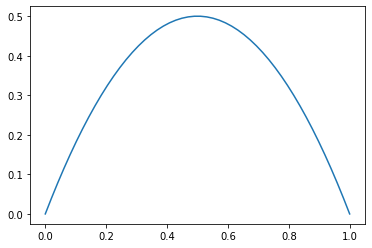

In [52]:
xx = np.linspace(0, 1, 50)
gini = 2 * xx * (1 - xx)
plt.figure(figsize=(6,4))
plt.plot(xx, gini, label="gini")
